In [1]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2

In [15]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

In [38]:
bs = 16

In [19]:
path = Path("images")

In [21]:
path.ls()

[WindowsPath('images/1.txt'),
 WindowsPath('images/dataset'),
 WindowsPath('images/mammooty'),
 WindowsPath('images/mohanlal')]

In [98]:
path_img = path/'dataset'

In [99]:
fnames = get_image_files(path_img)

In [100]:
fnames[:5]

[WindowsPath('images/dataset/mammooty_1.jpg'),
 WindowsPath('images/dataset/mammooty_10.jpg'),
 WindowsPath('images/dataset/mammooty_100.jpg'),
 WindowsPath('images/dataset/mammooty_101.jpg'),
 WindowsPath('images/dataset/mammooty_102.jpg')]

In [101]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [102]:
data  = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [103]:
data.classes

['mammooty', 'mohanlal']

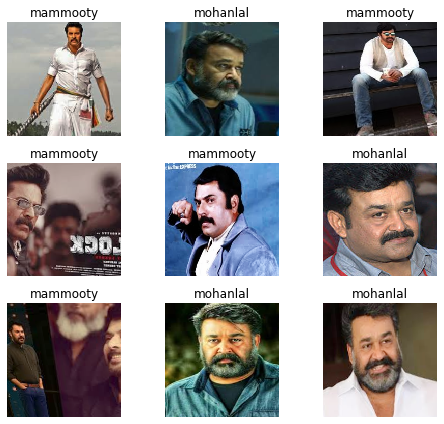

In [105]:
data.show_batch(rows=3,figsize=(7,6))

In [108]:
print(data.classes)
len(data.classes),data.c

['mammooty', 'mohanlal']


(2, 2)

In [110]:
learn = cnn_learner(data, models.resnet34,metrics=error_rate)

In [111]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [112]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.163717,0.838811,0.283784,00:27
1,0.918260,0.624896,0.216216,00:21
2,0.849903,0.723864,0.229730,00:21
3,0.766290,0.678280,0.229730,00:20


In [113]:
learn.save('stage-1')

In [114]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

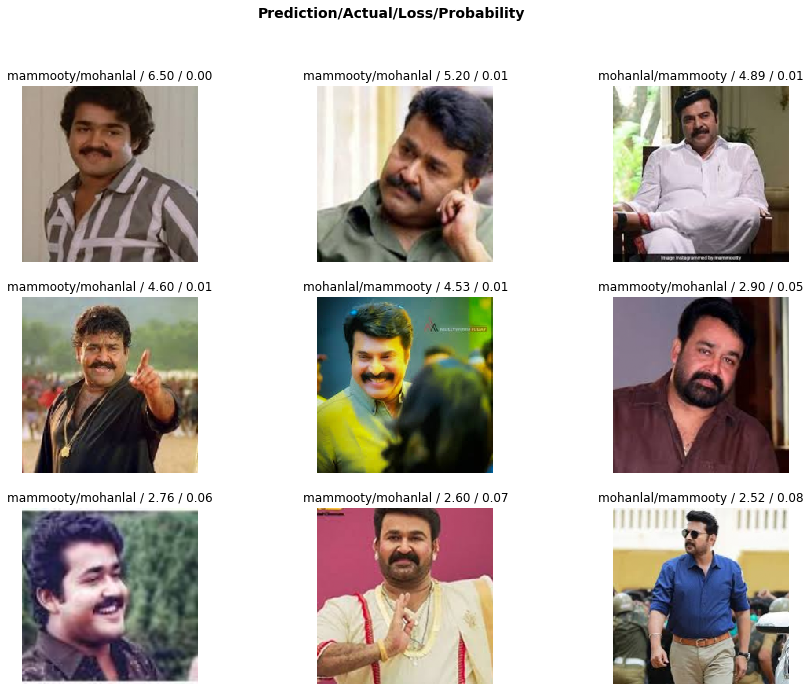

In [115]:
interp.plot_top_losses(9, figsize=(15,11))

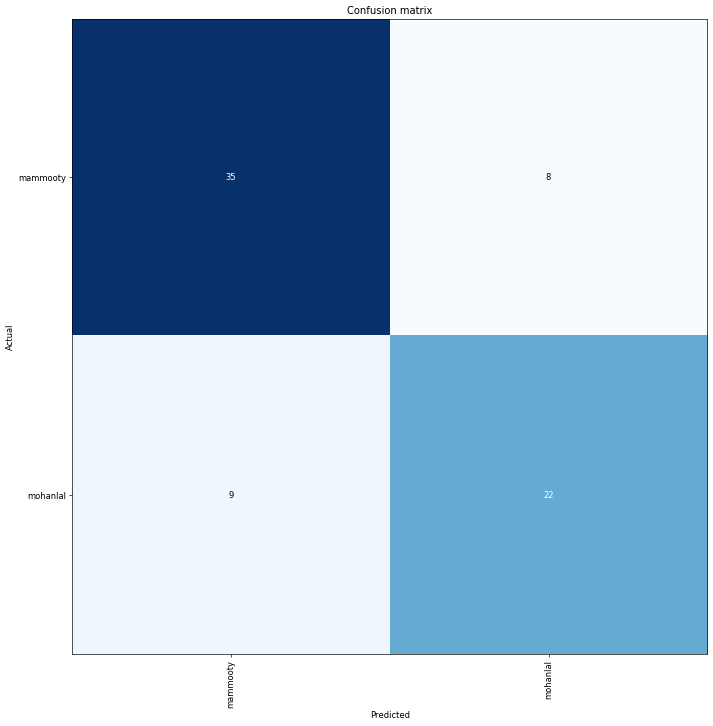

In [116]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [117]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.680650,0.647787,0.216216,00:24
1,0.601429,0.635401,0.216216,00:23


In [118]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


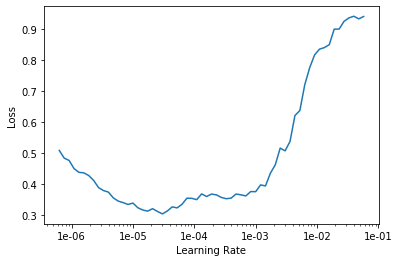

In [119]:
learn.recorder.plot()